# Beleg 2: Segmentierung

**Name: Johannes Plath**
<br>
**Matrikelnummer.:0575347**

## Bearbeitungszeitraum: 
**02.01. - 18.02**<br>



**Hinweise zum Beleg:** 
- Ein erfolgreiches Bestehen des Belegs ist Voraussetzung zum Bestehen des Kurses. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.
- Geben Sie als Lösung bitte das bearbeitete Notebook mit allen zusätzlich verwendeten Dateien die nicht die unten angegebenen Datensätze sind in einem Archiv ab - achten Sie bitte darauf im Notebook Ihren Namen und Matrikelnummer einzutragen.

**Aufgabe 4**: In dieser Aufgabe werden wir die Grundlage der Segmentierung üben sowie typische Schritte der Datenverarbeitung in diesem Bereich kennenlernen. (Quelle der Aufgabe: Tom Bison)

**Aufgabe 4.1**: Schauen Sie sich zunächst die Bilder im Ordner `mitosis_set` an. Hierbei handelt es sich um ein invasives Mammakarzinom, welches mit der IHC-Färbung für das Protein Phosphohistone-H3 (PHH3) gefärbt wurde. Der braune Ton der Mitosen entsteht durch Diaminobenzidine welches an die entsprechenden Antikörper für das PHH3 gebunden ist. Die blaue Färbung der nicht-mitotischen Zellkerne entsteht durch Haematoxylin. 

Die Dateinamen der Bilder enthalten jeweils zwei Informationen: Zum einen die ID des Bilders (eine fortlaufende Nummer beginnend mit 01) sowie die Anzahl der jeweils im Bild enthaltenen Mitosen. Die Angaben sind durch einen Underscore (\_) getrennt. Lesen Sie nun alle Bilder ein. Überlegen Sie sich eine passende Datenstruktur zur Speicherung der jeweiligen Anzahl an Mitosen.

In [ ]:
# Aufgabe 4.1:
import os

import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import cv2


path_one = 'mitosis_set'
test_path = 'mitosis_test_set'
file_list = os.listdir(path_one)

print(file_list)
resultlist = []

for entry in file_list:
        tmp = entry.rstrip('.png')
        resultlist.append(tmp.split('_'))
#for entry in resultlist:
 #       print('pic_Id: {}, count of mitosis: {}'.format(entry[0], entry[1]))
        

In [ ]:
#Stringoperationen

#print("string methoden: ", dir('test_string'))
#print("'aLoe'.lower() ", 'aLoe'.lower())
#print("'aLoe'.upper() ", 'aLoe'.upper())

#print( ('test.png'.rstrip('.png')))
#print('test_foo_png'.split('_'))
#print(type('01'), type(int('01')))

#a = 1
#b = 2 
#print(str(a) + '_' + str(b))
#print(f'{a}_{b}')
#print('{}_{}'.format(a,b))

In [ ]:

def closing_5_x_5(image, iteration):
    x = 0
    kernal_5 = np.ones((5, 5), np.uint8)
    kernal_7 = np.ones((7, 7), np.uint8)
    image = cv2.dilate(image,kernal_5 , iterations=2)
    image = cv2.erode(image,kernal_5 , iterations=1)
    while x < iteration:
        image = cv2.erode(image, kernal_5, iterations=iteration)
        image = cv2.dilate(image, kernal_5, iterations=iteration ) #scim.minimum_filter(image, kernal)
        #image = cv2.dilate(image, kernel, iterations=iteration) #scim.minimum_filter(image, kernal)
        x += 1
    #image = cv2.dilate(image, kernal_5, iterations=3)
    image = cv2.dilate(image, np.ones((3, 3), np.uint8), iterations=8)
    return image

def mask_image(img):
    mask = np.zeros(img[:,:,0].shape)
    #mask[np.where((35/255 < img[:,:,2]) & (img[:,:,2] < 145/255 ) &  (img[:,:,0] > 60/255))] = 1
    #mask[np.where(((109 / 255 < img[:, :, 0])  & (155 / 255 > img[:, :, 0])) & ( 165 / 255 > img[:, :, 1]) & (img[:, :, 2] < 50/255))] = 1 #(150/255 < img[:,:,0]) &
    mask[np.where(((90 / 255 < img[:, :, 0])  & (165 / 255 > img[:, :, 0])) & ((95 / 255 < img[:, :, 1]) & ( 130 / 255 > img[:, :, 1])) & (img[:, :, 2] < 76/255))] = 1
    return mask



In [ ]:

img = plt.imread(os.path.join(path_one, file_list[6]))
print(resultlist[19])
plt.imshow(img)
#plt.show
fig, axs = plt.subplots(1, 3, figsize=(25, 35))
axs[0].imshow(img[:,:,2], cmap='gray')
axs[0].set_title("original"  )




mask = mask_image(img)
axs[1].imshow(mask, cmap='gray')
axs[1].set_title("masked one")


closed_img = closing_5_x_5(mask, 3)
null, secondCount = ski.measure.label(closed_img, return_num=True, connectivity=1)
print("secondCount ", secondCount)
axs[2].imshow(closed_img, cmap='gray')
axs[2].set_title("closed one with {} mitoses".format(secondCount))
plt.show()

    
    

**Aufgabe 4.2**: Entwickeln Sie ein Verfahren zur Segmentierung der Mitosen. Als Teilschritte sollen sowohl die Segmentierungsmasken als auch die im Originalbild hevorgehobenen Mitosen (entweder, indem das Bild anhand der Maske zugeschnitten oder indem die Mitosen mit einem Polygon markiert wurden) ausgegeben werden können. Am Ende soll für jedes Bild die Anzahl an gefundenen Mitosen ausgegeben werden. Beginnen Sie erst mit Aufgabe 1.3, wenn ihr Algorithmus für jedes Bild die korrekte Anzahl an Mitosen findet. 

In [ ]:
# Aufgabe 4.2:
def print_found_mitosis(file_list, path):    
    expect_mitosis = 0
    founded_mitoses = 0
    scanned_pics = 0
    count_matches = 0
    for count, item in enumerate (file_list):
        scanned_pics +=1
        resultlist = []
        for entry in file_list:
            tmp = entry.rstrip('.png')
            resultlist.append(tmp.split('_'))
        img = plt.imread(os.path.join(path, item))
        #faltungsfilter
        img = cv2.blur(img,(7,7),0)
        img = cv2.blur(img,(7,7),0)
        fig, axs = plt.subplots(1, 3, figsize=(25, 35))
        axs[0].imshow(img[:,:,:])
        axs[0].set_title("original: " + item)
        mask = mask_image(img)
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title("masked one")
        closed_img = closing_5_x_5(mask, 3)
        null, secondCount = ski.measure.label(closed_img, return_num=True, connectivity=1)
        #print("secondCount ", secondCount)
        axs[2].imshow(closed_img, cmap='gray')
        axs[2].set_title("closed one with {} mitoses".format(secondCount))
        plt.show()
        founded_mitoses+=secondCount
        expect_mitosis += int(resultlist[count][-1])
        if (secondCount == int(resultlist[count][-1])):
            print(">>Matched!!!<<<")
            count_matches +=1
        else:print("...fail...")
    return founded_mitoses, expect_mitosis , scanned_pics, count_matches  


In [ ]:
file_list = os.listdir(path_one)
found, expect, count, matches = print_found_mitosis(file_list, path_one)
print((found/expect*100), "% of mitosis were found")
print('{} of {} pictures with mitoises were correct analysed, thats a result of: {}%'.format(matches, count, (matches/count*100)))

**Aufgabe 4.3**: Lesen Sie nun die Dateien aus dem Ordner `mitosis_test_set` ein, indem Sie erneut ihre zuvor definierte Datenstruktur verwenden. Wenden Sie ihr Verfahren einmalig auf diese Daten an (einmalig in dem Sinne, dass keine weitere Optimierung des Algorithmus durchgeführt wird) und geben Sie für jedes Bild aus, wieviele Mitosen ihre Implementierung gefunden hat und wieviele laut Dateinamen zu finden gewesen wären. Schließlich geben Sie noch die Genaugikeit ihrer Lösung für diesen Datensatz an, in dem Sie die Gesamtzahl der gefundenen Mitosen durch die Gesamtzahl der tatsächlichen Mitosen teilen. (Bemerkung: hier ist wirklich sauberes Arbeiten und nicht 100% Genaugigkeit als Resultat gefragt - ein test_set sollte idealerweise einmal genutzt werden)

In [ ]:
# Aufgabe 4.3:

In [ ]:
file_list2 = os.listdir(test_path)


# print(file_list2)
resultlist = []

for entry in file_list:
        tmp = entry.rstrip('.png')
        resultlist.append(tmp.split('_'))
for entry in resultlist:
        print('pic_Id: {}, count of mitosis: {}'.format(entry[-2], entry[-1]))
        

found, expect, count, matches = print_found_mitosis(file_list2, test_path)

print((found/expect*100), "% of mitosis were found")
print('{} of {} pictures with mitoises were correct analysed, thats a result of: {}%'.format(matches, count, (matches/count*100)))

In [7]:
# Aufgabe 4.3:

pic_Id: 01, count of mitosis: 0
pic_Id: 02, count of mitosis: 2
pic_Id: 03, count of mitosis: 1
pic_Id: 04, count of mitosis: 3
pic_Id: 05, count of mitosis: 0
pic_Id: 06, count of mitosis: 3
pic_Id: 07, count of mitosis: 2
pic_Id: 08, count of mitosis: 1
pic_Id: 09, count of mitosis: 2
pic_Id: 10, count of mitosis: 1
pic_Id: 11, count of mitosis: 0
pic_Id: 12, count of mitosis: 3
pic_Id: 13, count of mitosis: 1
pic_Id: 14, count of mitosis: 2
pic_Id: 15, count of mitosis: 0
pic_Id: 16, count of mitosis: 1
pic_Id: 17, count of mitosis: 0
pic_Id: 18, count of mitosis: 3
pic_Id: 19, count of mitosis: 2
pic_Id: 20, count of mitosis: 5


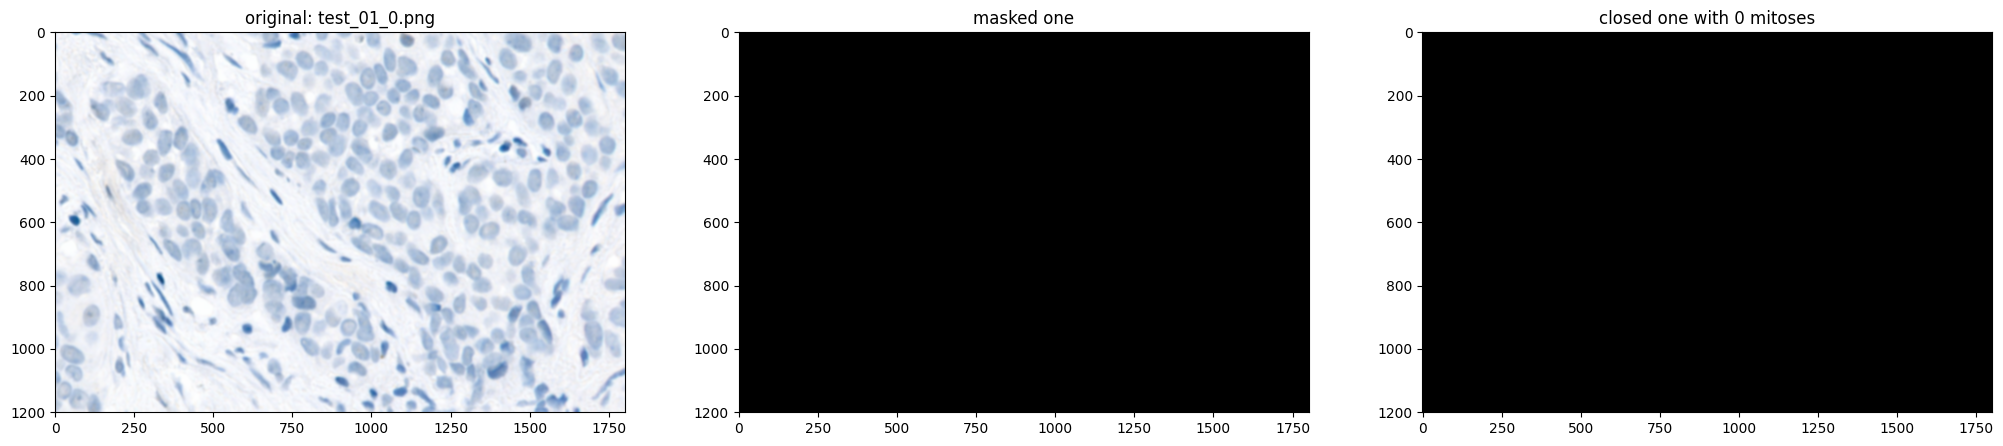

>>Matched!!!<<<


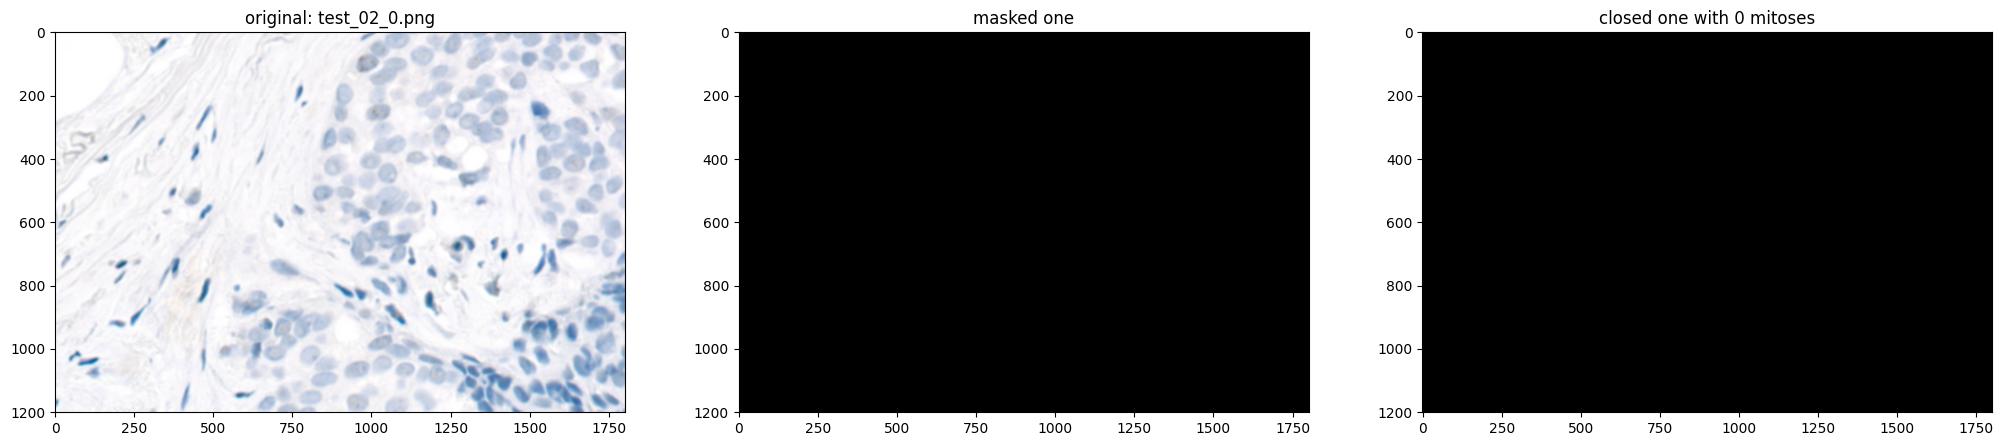

>>Matched!!!<<<


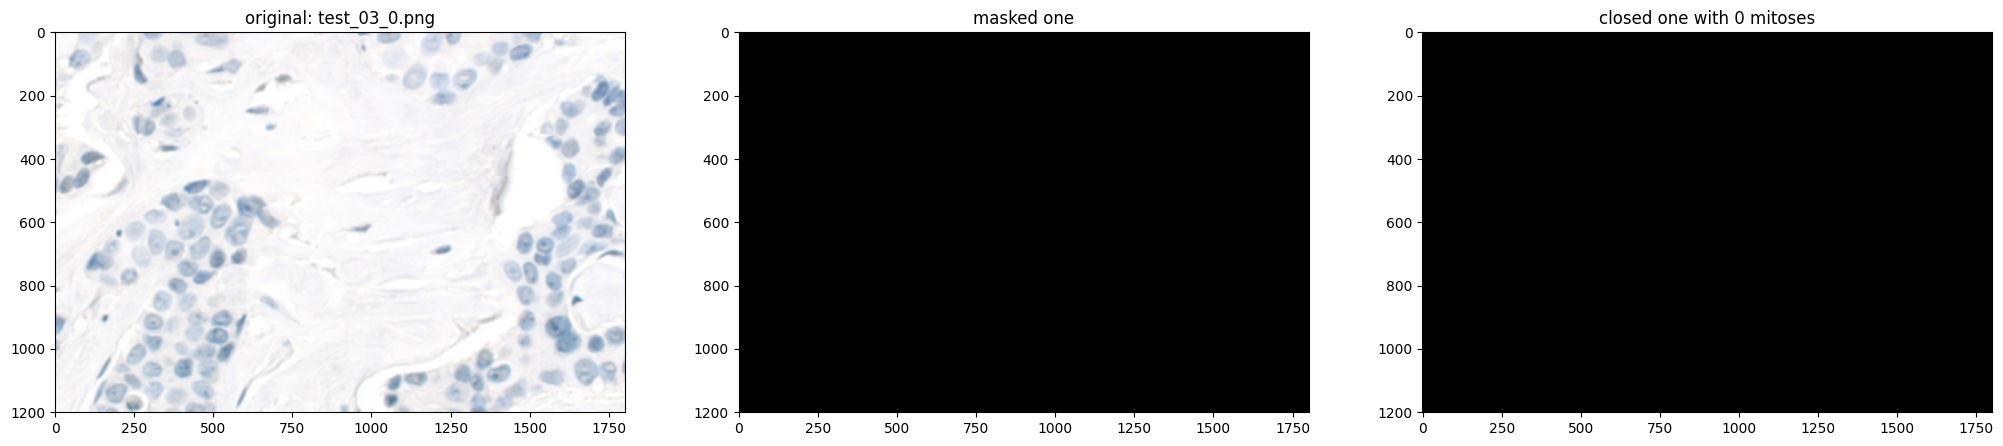

>>Matched!!!<<<


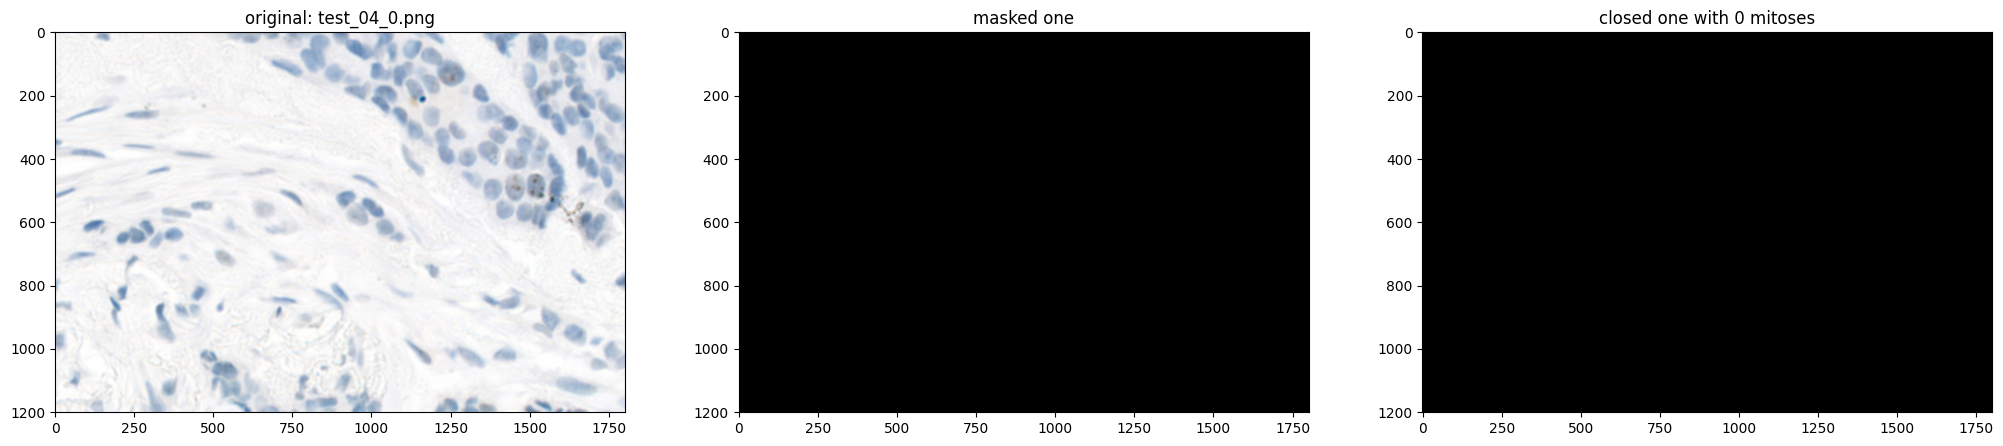

>>Matched!!!<<<


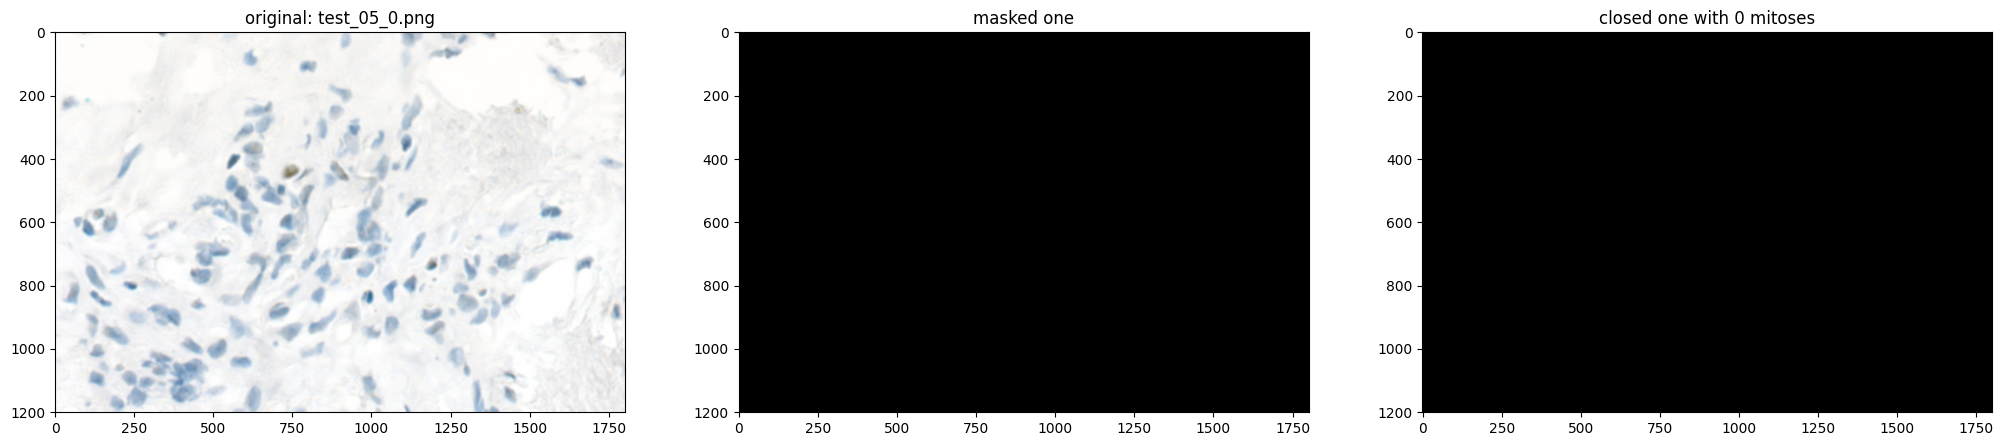

>>Matched!!!<<<


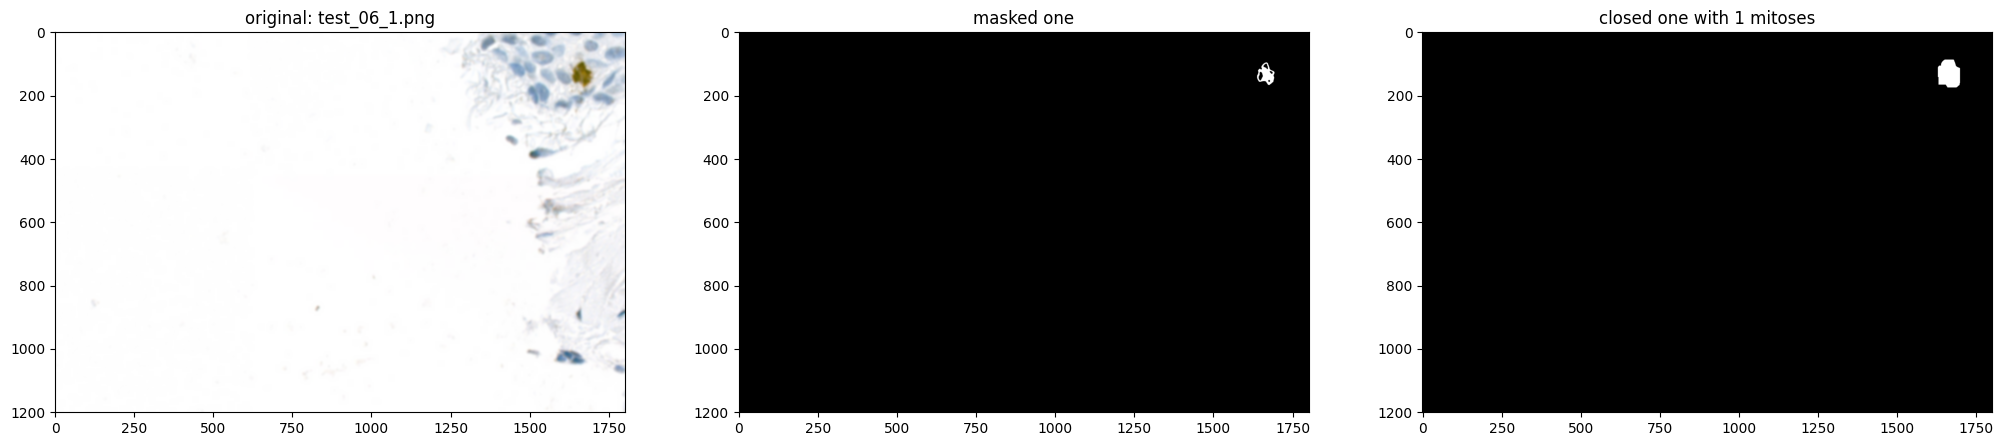

>>Matched!!!<<<


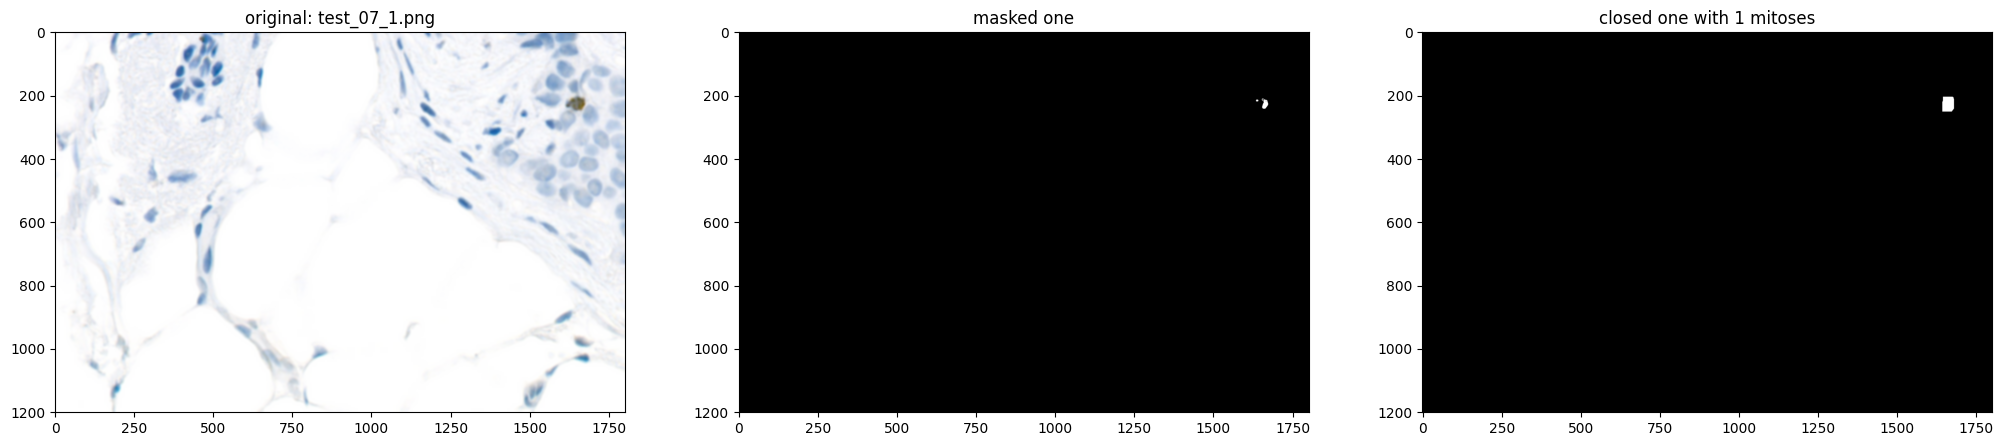

>>Matched!!!<<<


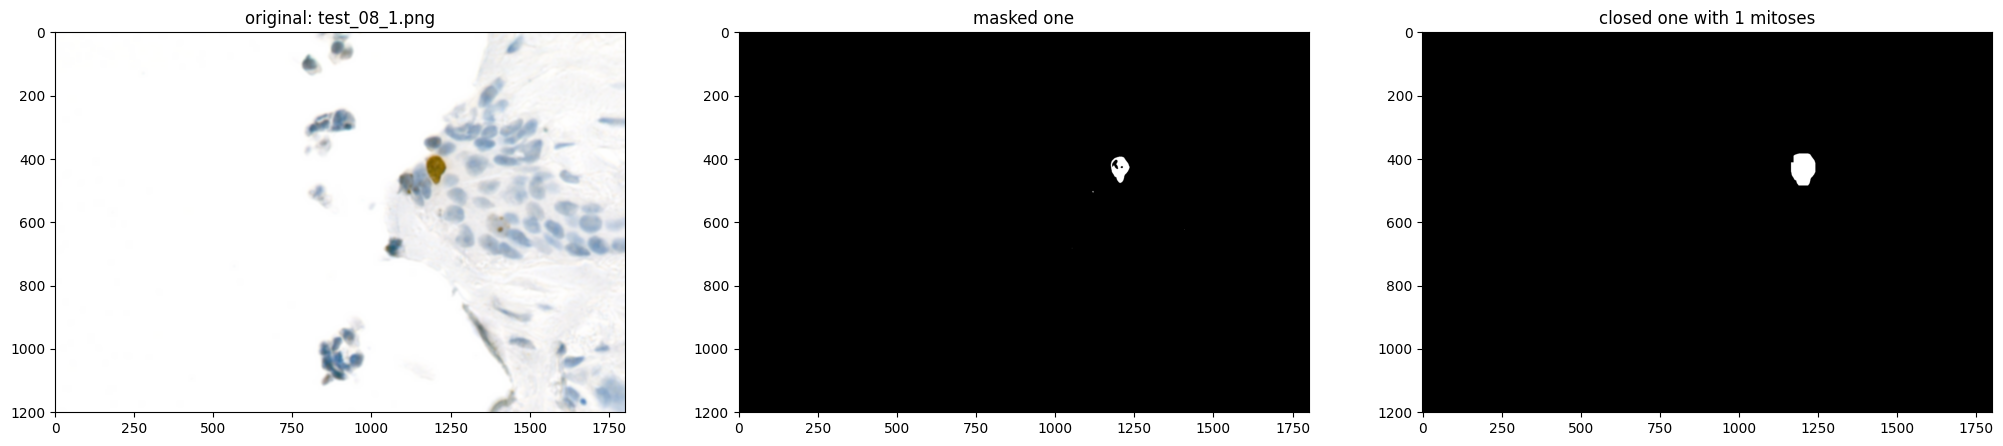

>>Matched!!!<<<


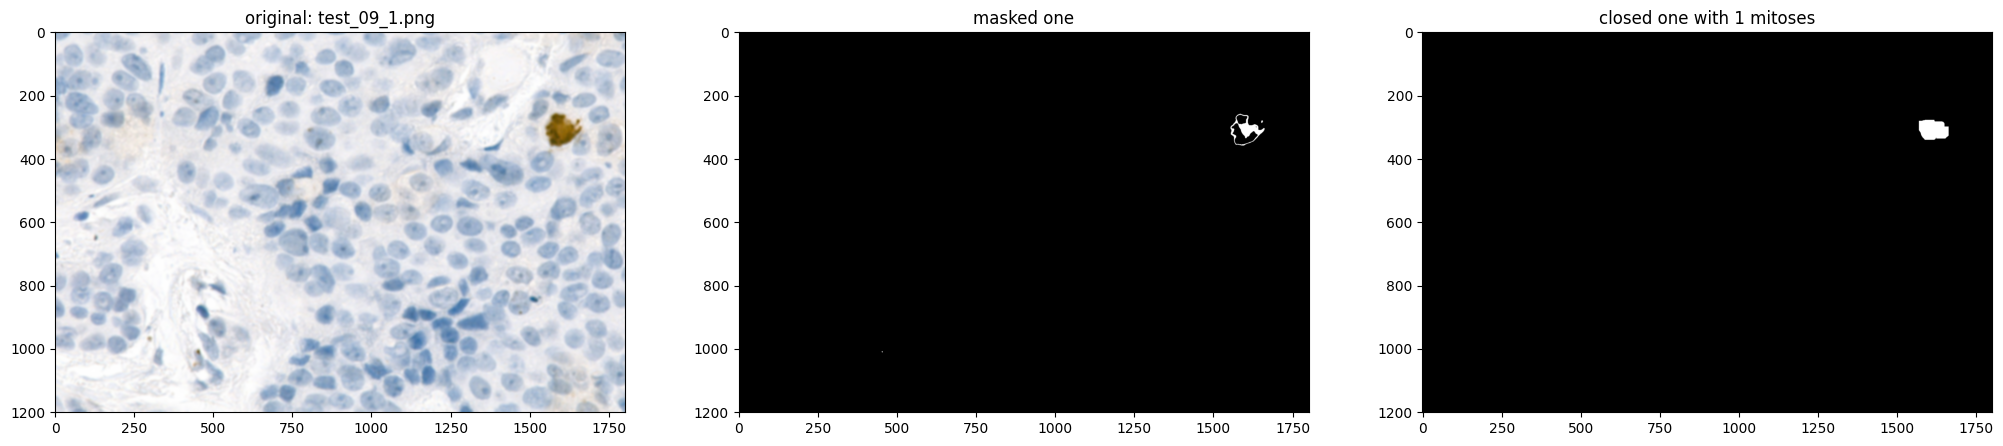

>>Matched!!!<<<


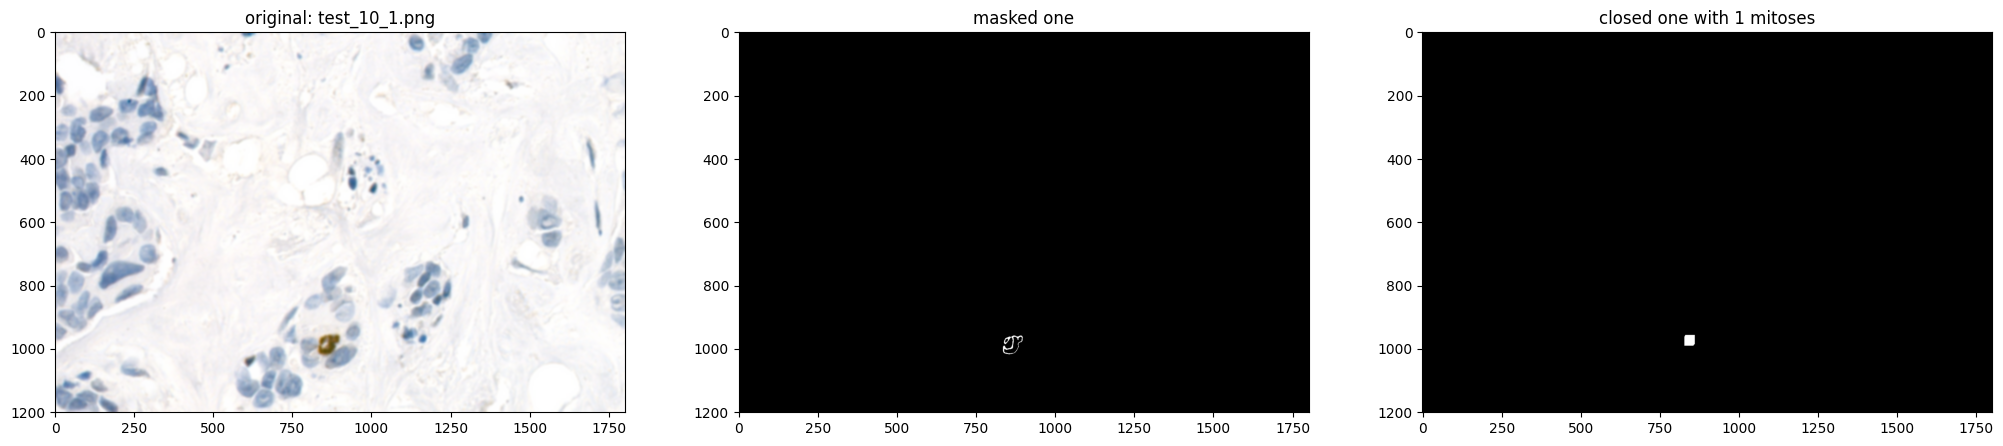

>>Matched!!!<<<


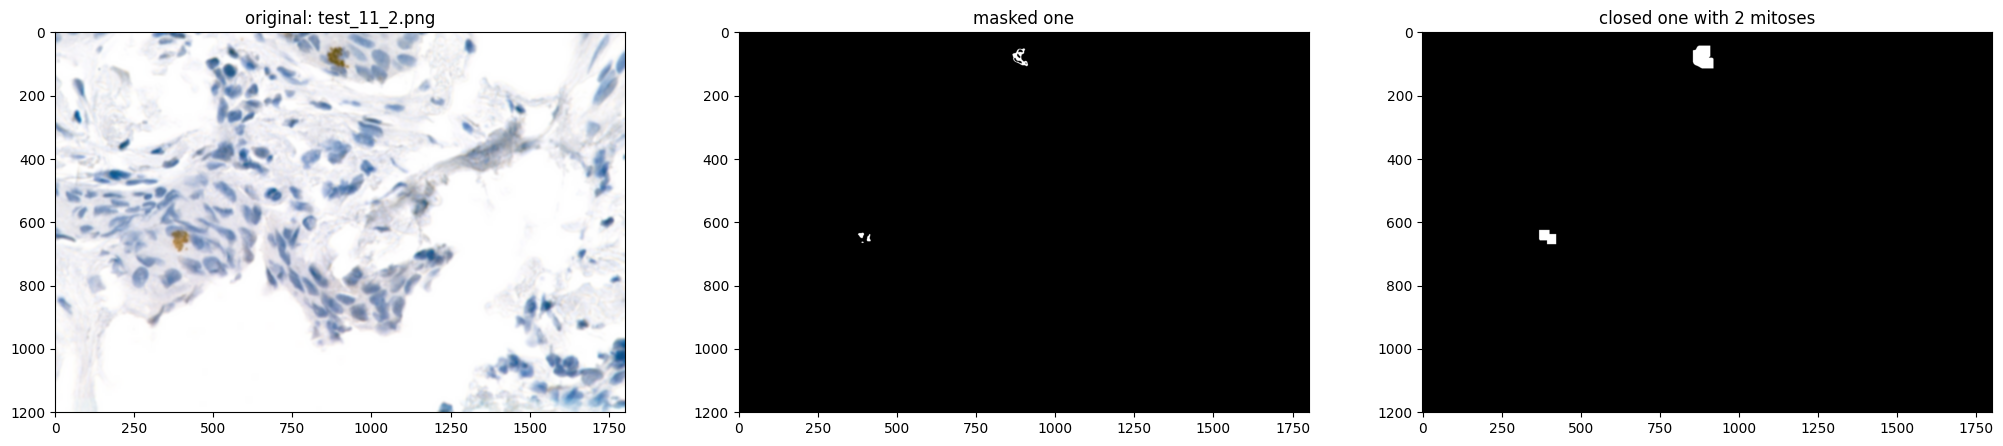

>>Matched!!!<<<


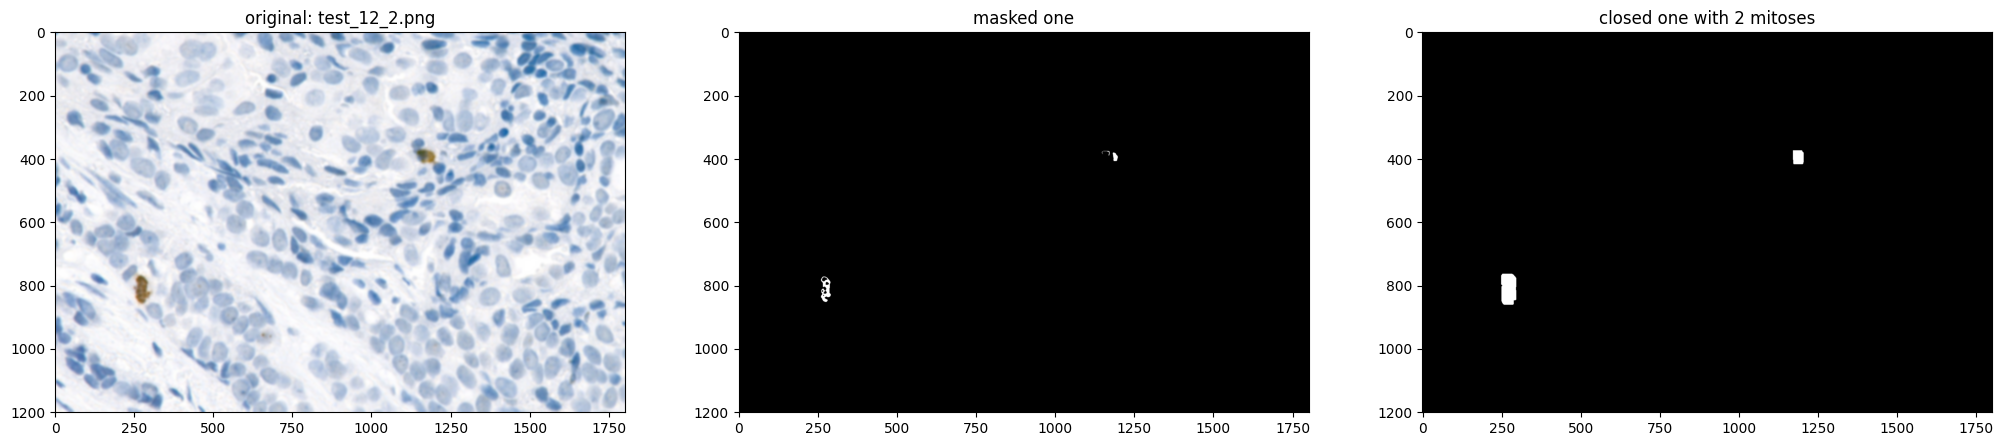

>>Matched!!!<<<


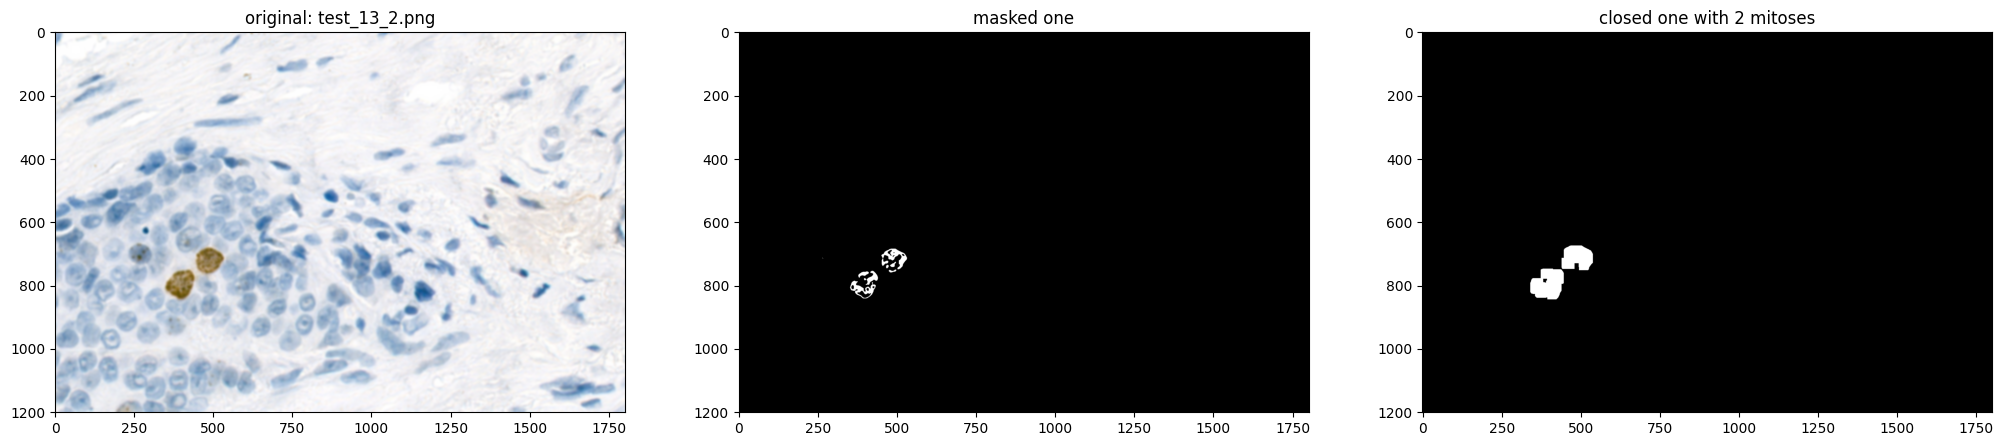

>>Matched!!!<<<


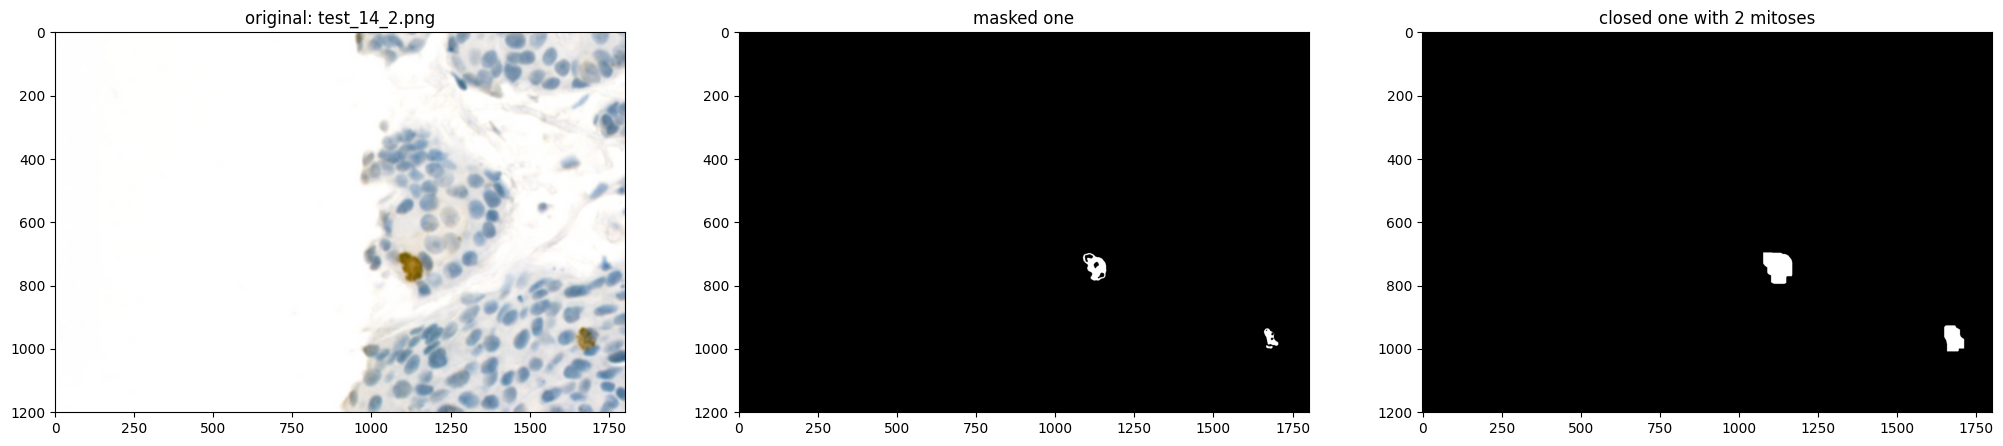

>>Matched!!!<<<


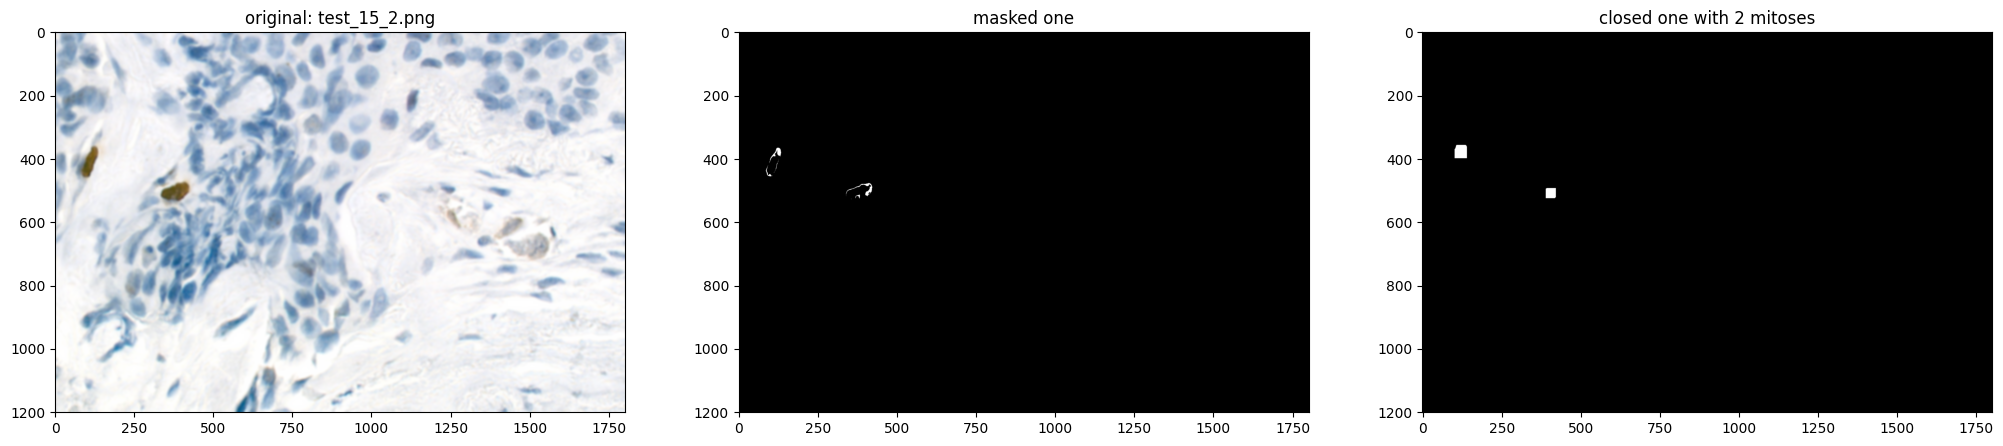

>>Matched!!!<<<


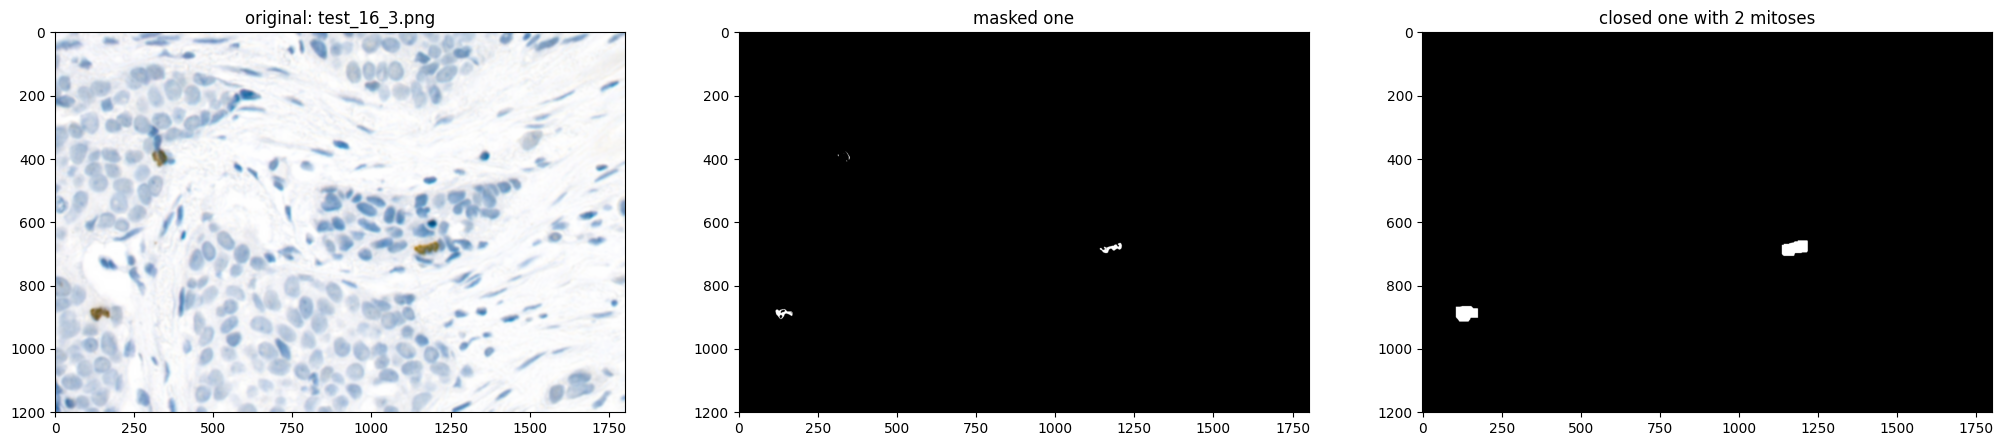

...fail...


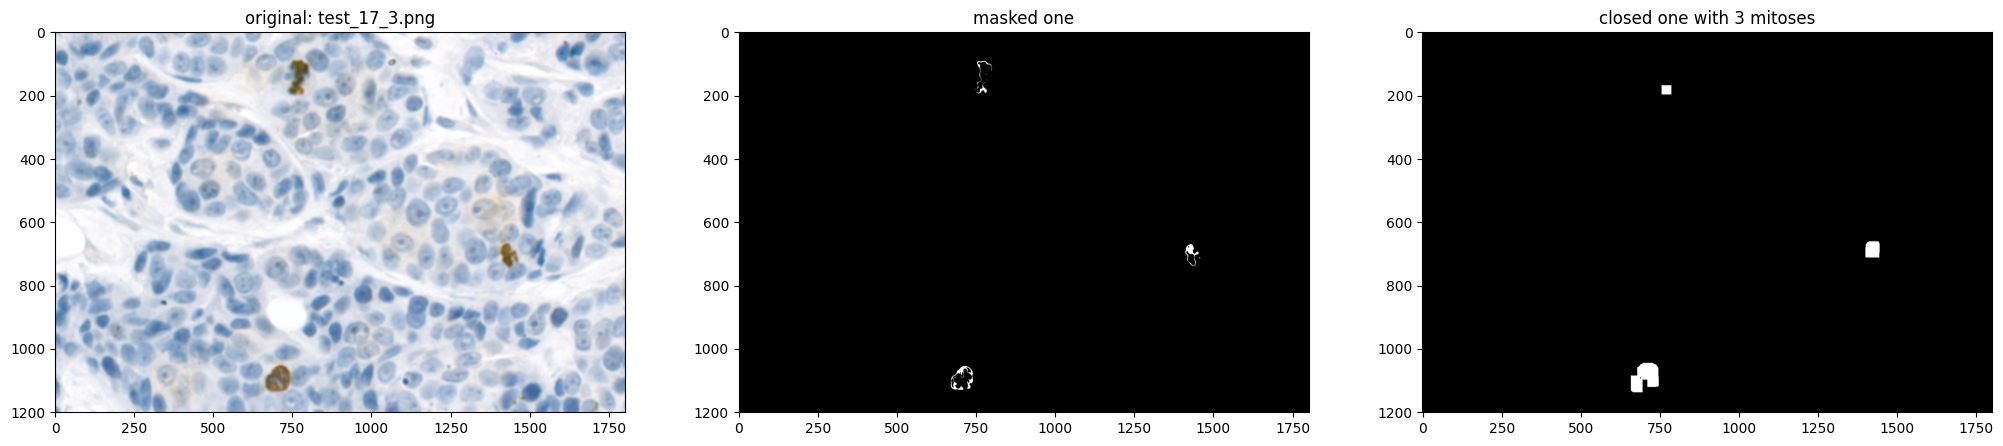

>>Matched!!!<<<


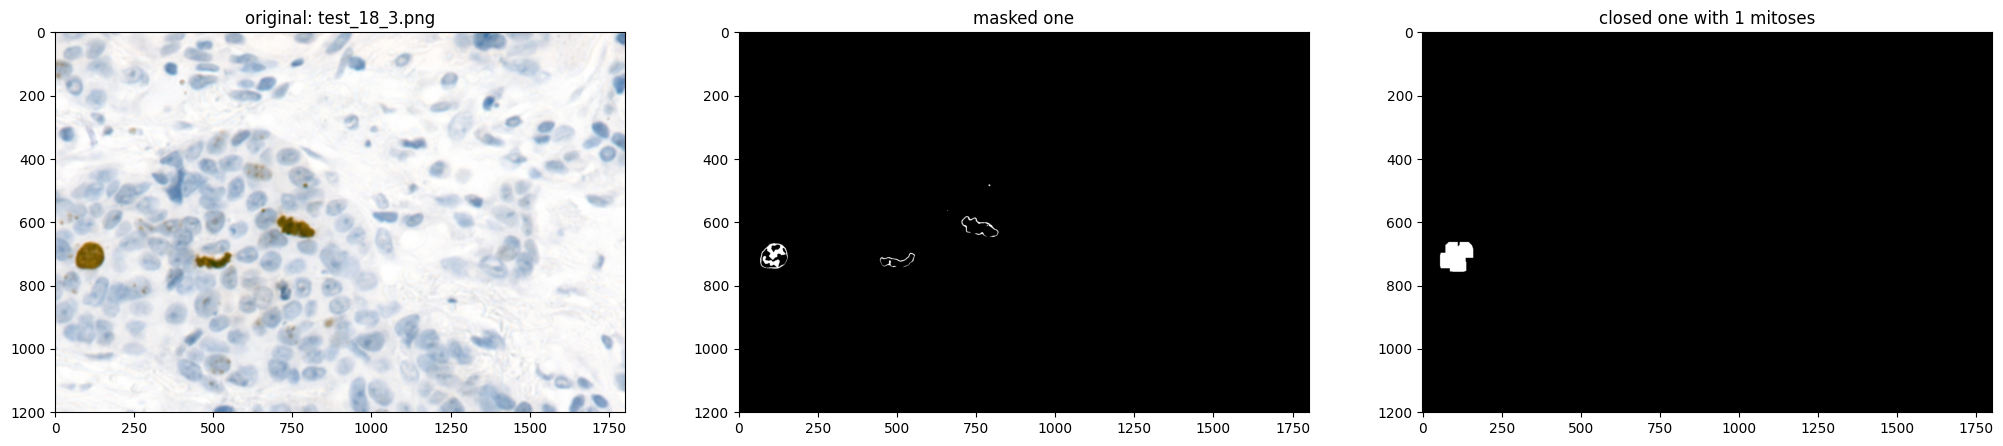

...fail...


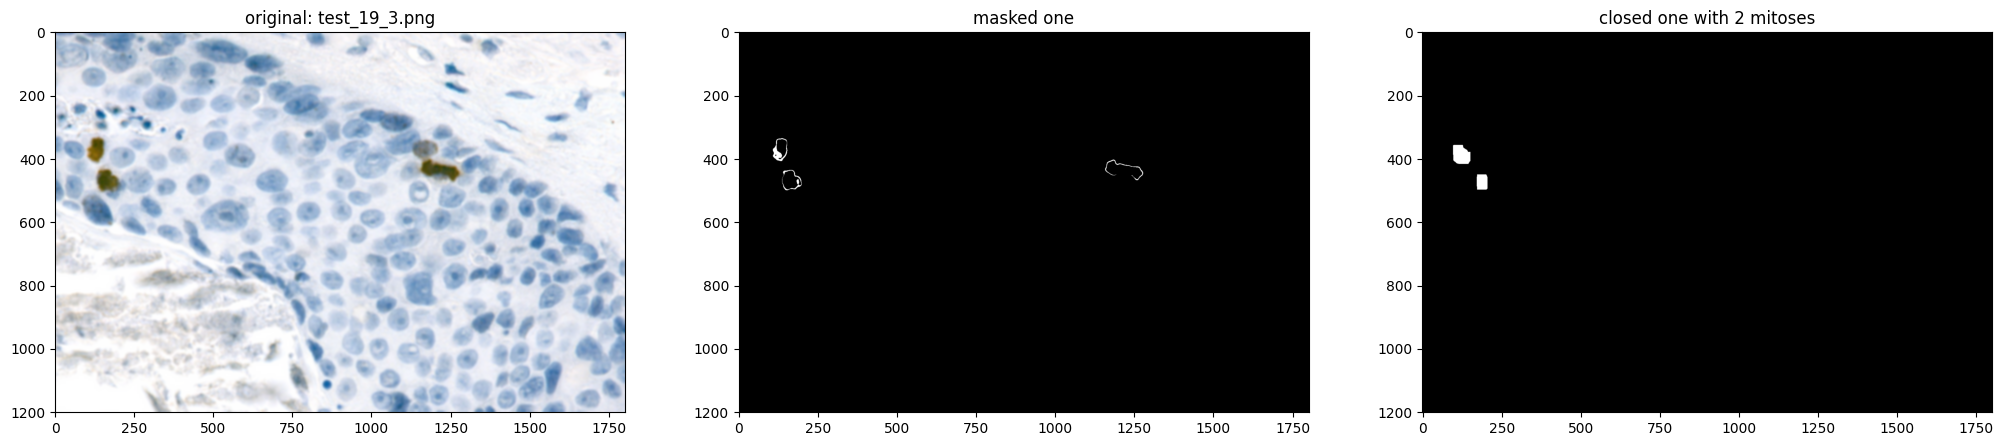

...fail...


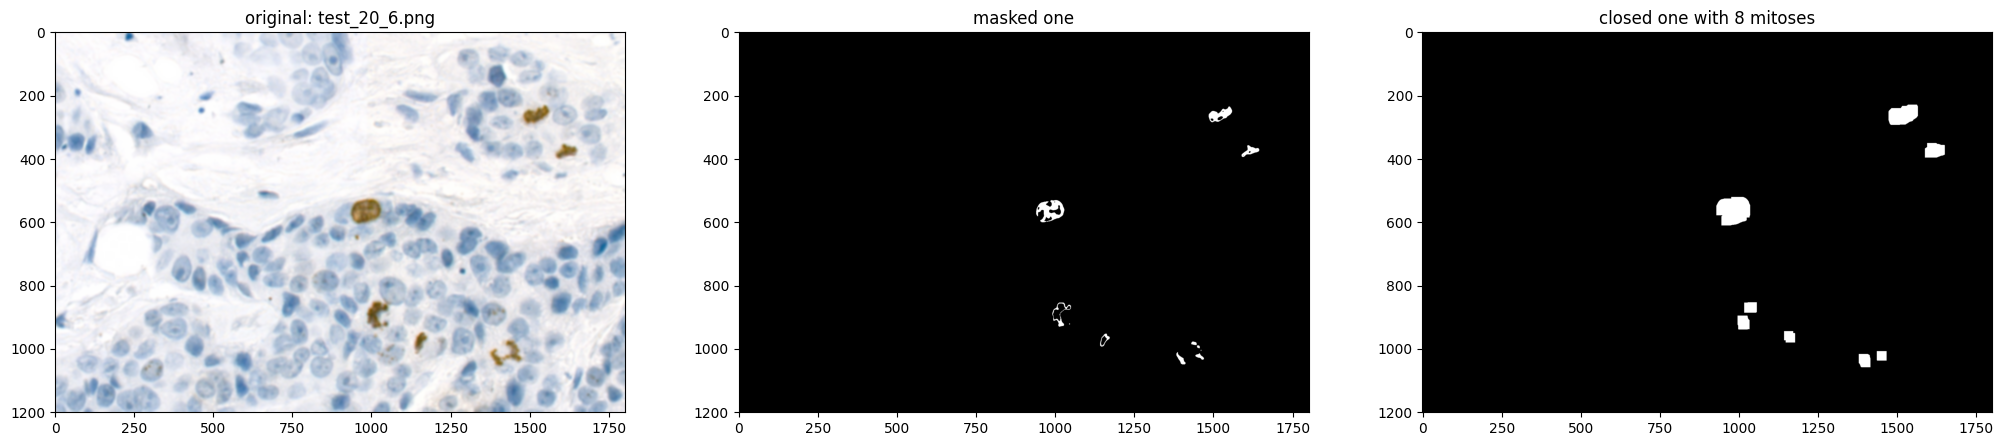

...fail...
93.93939393939394 % of mitosis were found
16 of 20 pictures with mitoises were correct analysed, thats a result of: 80.0%


In [8]:
file_list2 = os.listdir(test_path)


# print(file_list2)
resultlist = []

for entry in file_list:
        tmp = entry.rstrip('.png')
        resultlist.append(tmp.split('_'))
for entry in resultlist:
        print('pic_Id: {}, count of mitosis: {}'.format(entry[-2], entry[-1]))
        

found, expect, count, matches = print_found_mitosis(file_list2, test_path)

print((found/expect*100), "% of mitosis were found")
print('{} of {} pictures with mitoises were correct analysed, thats a result of: {}%'.format(matches, count, (matches/count*100)))